<a href="https://colab.research.google.com/github/Maarceeloo/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_(Chicago).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Chicago*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Por que escolhi Chicago?

<p align="center"><img src="https://img.freepik.com/fotos-gratis/panorama-da-noite-de-chicago_649448-3345.jpg?size=626&ext=jpg&ga=GA1.2.559654321.1669672138&semt=sph
"></p>

Fiz um intercâmbio de inglês durante 30 dias em Nova York, e nessa viagem conheci outras cidades nos EUA, como East Hamptons, South Hamptons, Montauk, Boston, Washington D.C., Philadelphia e Chicago. Passamos 4 dias em Chicago, e no geral as hospedagens ficam mais caras quanto mais perto da região central, decidimos economizar e ficamos na região de West Town, no bairro East Village, que possuía acesso fácil e rápido pelo metro.

Chicago é a maior cidade do estado de Illinois nos Estados Unidos, e a terceira cidade mais populosa do país com 2 milhões e 716 mil pessoas, ela fica à beira do lago Michigan.

De 8 a 10 de outubro de 1871, Chicago teve um grande incêndio que matou aproximadamente 300 pessoas e destruiu cerca de 9 km² da cidade, devido a todos prédios, ruas e calçadas serem construídos com madeira. A cidade foi reconstruída rapidamente, com estratégias de segurança e planejamento urbano, com um estilo de construção que utiliza ferro na estrutura, que acelera as construções, os ferros são bases do arranha-céus de Chicago. Hoje Chicago é conhecida mundialmente pelos seus estilos arquitetônicos, é considerada a cidade berço dos arranha-céus.


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Chicago (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2022-09-14/visualisations/listings.csv")

## Análise dos Dados
Aqui você encontra a descrição de cada coluna, para um melhor entendimento.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de avaliações nos últimos 12 meses
* `license` - código de registro na prefeitura


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, ele é um arquivo que pode conter centenas ou até milhares de dados, relacionando a algum assunto, os formatos em que eles são gerados geralmente são em uma planilha do Excel (XLS), CSV, TXT, JSOSN ou XML. Analisando as 5 primeiras entradas, já é possível ter o primeiro contato com esses dados e entender como eles foram distribuídos, com o comando *df.head()* verificamos as 5 primeiras entradas, precisando avaliar mais entradas, basta incluir a quantidade desejada dentro dos parênteses.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,110,3,207,2022-09-09,2.21,1,320,19,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,91,2,459,2022-08-28,2.86,1,320,51,R21000075737
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,157,4,56,2022-08-23,0.55,9,137,23,2209984
3,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,13,2022-09-12,0.15,1,165,6,R20000055258
4,24833,Prime LincolnPark 1 Block Fullerton Express L ...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,86,32,40,2022-04-23,0.27,3,306,2,City registration pending


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesta versão resumida do Airbnb, ela apresenta as informações através de entradas e variáveis, as entradas são as linhas temos um total 7414 a serem analisadas, juntamente com 18 variáveis que são as colunas. 

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 7414
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

<p align="center"><img src="https://media.istockphoto.com/id/1391582011/photo/red-question-mark-sitting-next-to-percentage-sign-engraved-wood-block-before-defocused.jpg?b=1&s=170667a&w=0&k=20&c=Oy3-yCxuezyH1ovFPk3MXjnXdvDt_QyaMz6wp4IMBOo=
"></p>

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes, é importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus dados faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 17,70% das linhas, `license` apresenta 17,08%.
* Um ponto interessante a considerar na análise da coluna license, é que existe uma medida regulatória na cidade de Chicago, onde os proprietários de imóveis que possuem casas para aluguéis de temporada em sites de reservas, devem possuir um licenciamento junto aos órgãos públicos, onde pagam uma taxa anual para obtê-lo, identificamos que 17,08% não possuem essa informação na plataforma. Proprietários de aluguel por temporada que violarem a lei enfrentarão multas entre 5.000 a 10.000 dólares, destacando-se esse item essencial para análise, tanto para quem faz a reserva quanto para quem aluga.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.176963
last_review                       0.176963
license                           0.170758
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

#### Limpeza dos Dados
Notamos que a coluna `neighbourhood_group` não possui dados, por esse motivo iremos exclui-la, com o método df.drop, já as colunas `reviews_per_month`, `last_review` e `license` não iremos excluir as entradas, existe uma grande quantidade de hospedagens nessa situação, que não possuem avaliação ou licença, conforme pode ser conferido abaixo:

In [ ]:
# excluindo valores ausentes
df.drop(columns=['neighbourhood_group'], inplace=True)

# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

reviews_per_month                 1312
last_review                       1312
license                           1266
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_name                            0
host_id                              0
price                                0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma. Com esses dados mais visuais é verificado a concentração de algumas variáveis (colunas), como preço, minímo de noites e número de avaliações em geral, podemos verificar que a maioria dos imóveis ficam nas faixas iniciais de cada gráfico.

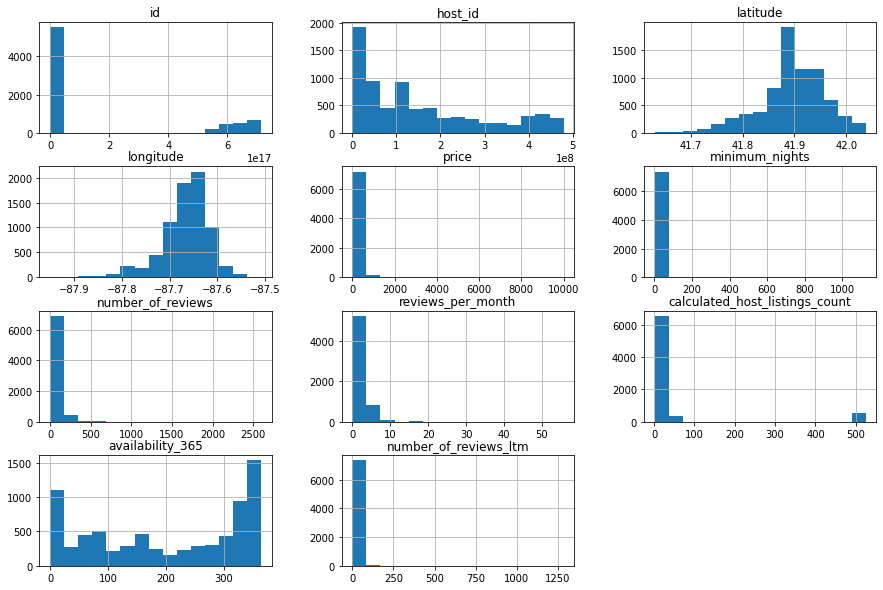

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4.  Há outliers presentes?**

Os outliers são dados que se diferenciam radicalmente dos outros, eles ficam distantes do padrão, esses geralmente causam anormalidades nos resultados obtidos pelos algoritmos e pelo sistema de análise. Como exemplo existe um castelo na plataforama com um alto custo diário para locação, ao contrário pode ter alguma residência com valor zerado ou com alguma inconsistência, nessas duas situações teremos interferências no resultado da análise.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

Abaixo conseguimos visualizar as mínimas, médias e máximas de cada coluna.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7414.000000,7414.000000,7414.000000,6102.000000,7414.000000,7414.000000
mean,211.694767,14.580388,46.316968,1.986147,44.548692,200.869706
std,288.524481,41.305189,82.506890,1.936698,133.163519,132.220453
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,93.000000,2.000000,2.000000,0.560000,1.000000,74.000000
50%,150.000000,2.000000,14.000000,1.600000,3.000000,222.000000
75%,237.000000,32.000000,55.000000,2.970000,12.000000,333.000000
max,10000.000000,1125.000000,2600.000000,55.710000,525.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável `price` possui 75% do valor abaixo de 237, porém seu valor máximo é 10000.
A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

A variação interquartil (IQR) tem como função identificar matematicamente os outliers, para calcular ele iremos usar o Q3 que seria o 75% do nosso describe, e diminuir do Q1 que seria os 25% chegando no resultado do IQR. Com o IQR iremos definir os limites inferiores e superiores de cada variável e será removido os outliers, de acordo com um corte determinado, assim conseguimos um melhor tratamento para os dados.

#### Definindo limites para minimum_nights


In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nigths: ', sup_minimum_nights)
print('Limite inferior de minimum_nigths: ', inf_minimum_nights)

IQR da variável minimum_nights:  30.0
Limite superior de minimum_nigths:  77.0
Limite inferior de minimum_nigths:  -43.0


#### Boxplot para minimum_nights
Verificamos que no cálculo do IQR, na coluna `minimum_nights`, não podemos efetuar o corte com mínimo de noites em 30 dias, pois seria perdido 2329 entradas que corresponde a 31,41% do total da base, sabendo disso iremos realizar o corte em 32 dias, acima disso estão somente 166 entradas que correspondem a 2,24% do total.

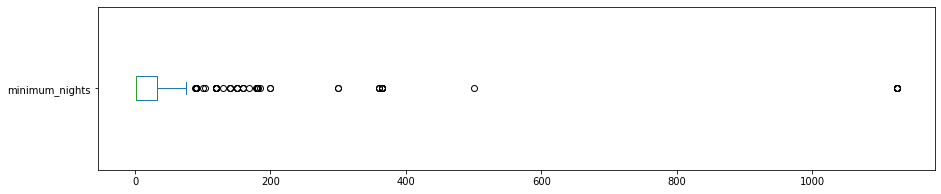

minimum_nights: valores acima de 32:
166 entradas
2.2390%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#ver quantidade de valores acima de 32 dias para minimum_nights
print("minimum_nights: valores acima de 32:")
print("{} entradas".format(len(df[df.minimum_nights > 32])))
print("{:.4f}%".format((len(df[df.minimum_nights > 32]) / df.shape[0]*100)))

Definindo limites para Price

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites 
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  144.0
Limite superior de price:  453.0
Limite inferior de price:  -123.0


Boxplot para price

Na variável preço, limitamos a diária até o valor de 453 doláres, verificou-se que apenas 7,85% das 7414 entradas possuem diárias acima desse valor.

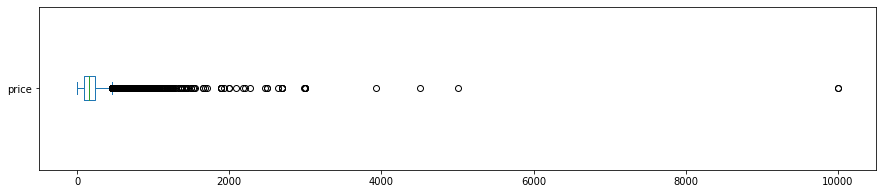

O dataset possui 7414 colunas

price: valores acima de 453.0
582 entradas
7.8500%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 453 para price
print("O dataset possui {} colunas".format(df.shape[0]))
print("\nprice: valores acima de 453.0")
print("{} entradas".format(len(df[df.price >453.0])))
print("{:.4f}%".format((len(df[df.price > 453.0]) / df.shape[0]) *100))



# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*
Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.
Com esse filtro realizado conseguimos ter uma análise mais próxima da realidade, pois a maioria dos imóveis se concentram nessas faixas selecionadas. Nessa limpeza eliminamos as entradas com `price` zeradas, e limitamos o preço em 453,00 doláres e 32 dias o minímo de diárias. 

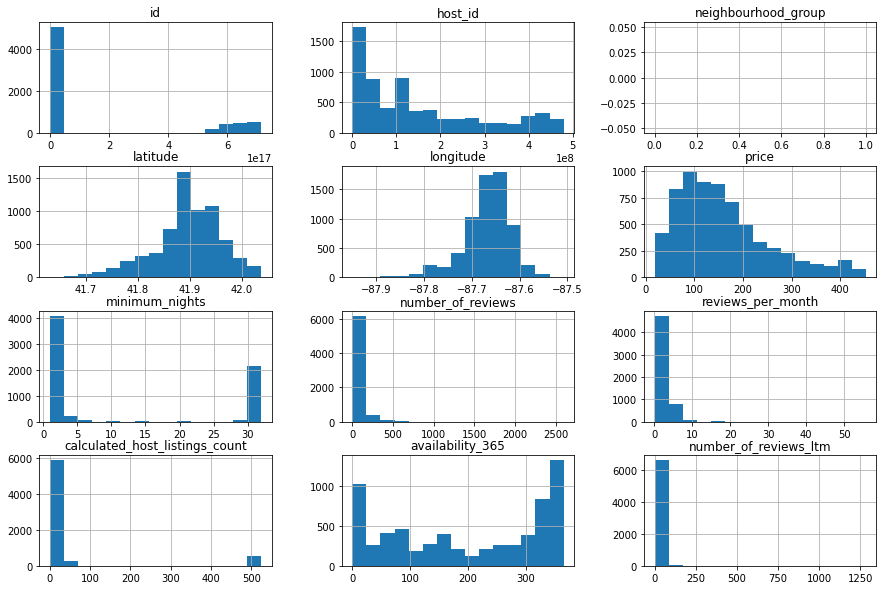

In [ ]:
# remover os *outliers* em novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 453].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 32].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Os gráficos ficaram mais uniformes e mais alinhados com o objetivo da análise, abaixo estão descitas as entradas de acordo com os cortes realizados.

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.669000e+03,6.669000e+03,0.0,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,5592.000000,6669.000000,6669.000000,6669.000000
mean,1.570976e+17,1.493300e+08,NaN,41.895282,-87.667721,160.366022,11.980207,49.360774,2.049054,47.958165,197.208427,15.038237
std,2.753086e+17,1.420452e+08,NaN,0.065191,0.050398,95.434899,14.033764,85.578195,1.979540,139.742431,132.657925,26.462918
min,2.384000e+03,2.153000e+03,NaN,41.630450,-87.950370,18.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.758458e+07,3.043362e+07,NaN,41.865120,-87.691550,90.000000,2.000000,2.000000,0.590000,1.000000,71.000000,0.000000
50%,4.539969e+07,1.074344e+08,NaN,41.898620,-87.661190,140.000000,2.000000,16.000000,1.660000,3.000000,209.000000,6.000000
75%,5.433059e+07,2.421561e+08,NaN,41.939680,-87.633330,205.000000,32.000000,60.000000,3.010000,11.000000,332.000000,23.000000
max,7.149119e+17,4.791517e+08,NaN,42.037660,-87.507940,453.000000,32.000000,2600.000000,55.710000,525.000000,365.000000,1284.000000


### **Q5. Qual a média dos preços de aluguel?**

<p align="left"><img src="https://images.unsplash.com/photo-1480074568708-e7b720bb3f09?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTZ8fEhPVVNFfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60
"></p>
A média das diárias ficaram em US$ 160,37.

In [ ]:
# ver a média da coluna `price``
df_clean['price'].mean()

160.36602189233767

### **Q6. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.080346,-0.055810,0.065901,0.068551,0.049057
minimum_nights,-0.080346,1.000000,-0.251900,-0.374881,0.420817,0.043228
number_of_reviews,-0.055810,-0.251900,1.000000,0.596256,-0.175064,-0.041504
reviews_per_month,0.065901,-0.374881,0.596256,1.000000,-0.154736,0.073391
calculated_host_listings_count,0.068551,0.420817,-0.175064,-0.154736,1.000000,0.185609
availability_365,0.049057,0.043228,-0.041504,0.073391,0.185609,1.000000


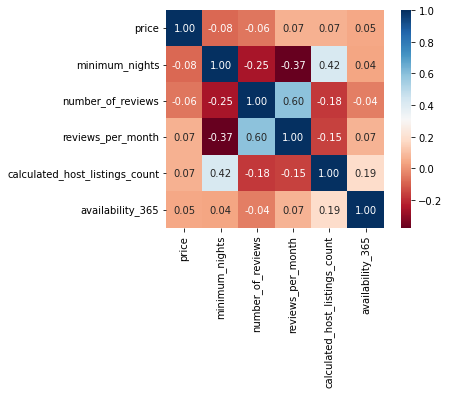

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna `room_type` indica qual categoria de locação está anunciada na plataforma. No site ou aplicativo, existem opções de apartamentos/casas inteiras, aluguel de um quarto privado com casa compartilhada ou até mesmo dividir o mesmo quarto com outras pessoas.
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    4992
Private room       1543
Shared room          87
Hotel room           47
Name: room_type, dtype: int64

O tipo de imóvel mais alugado são casa ou apartamento inteiro, correspondem a 74,85% do total, nessa modalidade você possui a disposição o imóvel todo para utilização como cozinha e sala de estar, ideal para grandes grupos e para quem procura privacidade, já que você não vai contar com a presença do proprietário do imóvel.

Em seguida vem a opção quarto inteiro, onde você tem um quarto  privativo, na maioria das vezes com acesso as dependências da casa, entretanto são de uso compartilhado com outros hóspedes ou com próprio anfitrião, representam 23,14% do total reservado.

Na terceira posição com 1,30% estão os quartos compartilhados, onde é  dividido o quarto com outras pessoas, e por último os clássicos hotéis que  representam 0,70% das locações analisadas.


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.748538
Private room       0.231369
Shared room        0.013045
Hotel room         0.007048
Name: room_type, dtype: float64



---



### **Q8. Qual a localidade mais cara de Chicago?**

<p align="center"><img src="https://images.unsplash.com/photo-1596250410216-1ac77dc208e3?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OHx8Y2hpY2Fnb3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60
"></p>

Cada viajante possui um objetivo especifico na sua viagem, uns vão para desbravar a cidade, optando por ficar em lugares mais baratos, já outros prezam mais pelo conforto, ou estão em busca por uma experiência de ficar em um local exclusivo com uma bela vista da cidade. Acima temos uma linda imagem da região de Loop, que fica na parte central da cidade, na tabela abaixo estão as localidades mais caras da cidade:



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:12]

neighbourhood
Near South Side       264.176056
Clearing              241.875000
Loop                  224.770440
Lincoln Park          210.012448
Near North Side       202.423135
Burnside              200.000000
North Center          188.394495
Oakland               182.444444
Lake View             177.938069
Washington Heights    172.750000
Near West Side        170.069136
West Town             167.232290
Name: price, dtype: float64

Chicago está dividida em 77 áreas comunitárias para fins estáticos e de planejamento. Near South Side é a região com os maiores valores, onde ficam algumas das estruturas mais famosas da cidade, como estádio e o Museum Campum que é o principal centro de convenções de Chicago, que abriga um museu, um aquário e um planetário.

Clearing, que é a segunda área com valores mais caros, tem como característica de ser uma região residencial, com grandes casas, analisando no detalhe, foi verificado que possuem apenas 8 imóveis para locação, a maioria no formato de casas unifamiliares, que são casas para hospedar grandes famílias ou grupos, por serem imóveis maiores, em menores quantidades, acaba subindo a média de preços em comparação com as outras localidades.

Na sequência as regiões de Loop, Lincoln Park e Near North Side, são as próximas áreas mais caras para se hospedar em Chicago, são nelas que ficam localizados os principais pontos turísticos da cidades, como parques, bares, restaurantes, entre outros.

<p align="center"><img src="https://images.unsplash.com/photo-1592251895646-a1d4a1afbe49?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MjR8fGNoaWNhZ298ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60
"></p>

Na 12ª posição, com média da diária no valor de 167,23 dólares é a região de West Town, a que escolhemos para passar quatro dias, mas se você pesquisar bem conseguirá encontrar valores menores nessa região, ficamos hospedados na modalidade de um quarto inteiro para duas pessoas com banheiro privativo, e pagamos uma diária de aproximadamente 86,00 dólares. Na região existe estações de metro bem próximas que facilita o deslocamento para outras áreas, além do bairro ter uma estrutura completa como restaurantes, bares e mercados.


In [ ]:
# ver quantidade de imóveis no Clearing
print(df_clean[df_clean.neighbourhood == "Clearing"].shape)

# ver as 3 entradas do Clearing
df_clean[df_clean.neighbourhood == "Clearing"]

(8, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3049,41643452,3 Bedroom House,198521417,Pawel,Clearing,41.779090,-87.771930,Entire home/apt,89,32,0,NaN,NaN,1,0,0,City registration pending
3807,48096009,✈️ 🌏 Midway Airport 2 Bedroom w/ full kitchen 🌏✈️,235678953,Patricia,Clearing,41.781730,-87.740350,Entire home/apt,216,32,12,2022-04-23,0.65,11,176,10,R21000061423
6158,643615922994248988,✈️ 🌎Midway Airport 2 Bedroom w/ full Kitchen🌎 ✈️,235678953,Patricia,Clearing,41.781940,-87.740260,Entire home/apt,244,1,2,2022-08-01,1.20,11,251,2,R22000077481
6745,692075993209327711,Charming Private Room #2 in Chrysler Chicago,468880306,Wanxiu,Clearing,41.775363,-87.750060,Shared room,31,32,3,2022-09-12,3.00,1,351,3,R12345678901
6926,705257233553075028,4 Bedroom comfortable Home w/Gaming & Technology!,136825532,FreeStand Home Solutions,Clearing,41.780720,-87.780930,Entire home/apt,399,2,0,NaN,NaN,28,90,0,R19000048100
6929,705319052520875351,Comfortable Rental on - 64th Street,476956265,Leslie,Clearing,41.775798,-87.772701,Entire home/apt,399,2,0,NaN,NaN,19,103,0,R19000048100
6941,705858558343241323,"7 beds (5 Bedroom) Home w/Garage, & GameRoom!",136825532,FreeStand Home Solutions,Clearing,41.776034,-87.773779,Entire home/apt,399,2,0,NaN,NaN,28,90,0,R19000038100
7139,43779145,"Close to Midway,HWYS,DNTWN. Entire floor, patio",113128950,Zyggi,Clearing,41.780140,-87.805690,Entire home/apt,158,4,19,2022-09-05,2.13,1,172,19,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

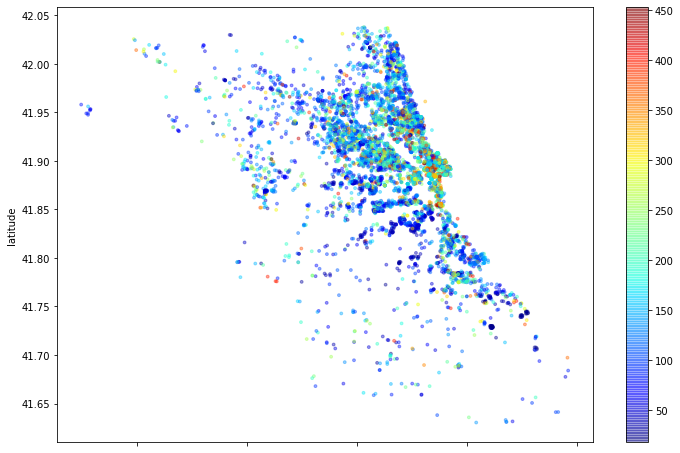

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Abaixo podemos verificar a média do minimo de noites exigidas para estadia, de acordo com a análise do resumo estátisco, foi constatado que até 50% das hospedagens exigem um mínimo de 2 noites, outro fato curioso é que 25% delas exigem uma permanência mínima de 32 dias, o que a acaba subindo a média geral para 12 dias.

In [ ]:
# ver a média da coluna `minimum_nights``
print("{:.0f}".format(df_clean.minimum_nights.mean()))

12


## Conclusões


<p align="center"><img src="https://images.unsplash.com/photo-1599492968050-f0eb8a2b3caa?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mjh8fGNoaWNhZ298ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60
"></p>


Podemos concluir que Chicago possui uma grande quantidade de imóveis disponíveis para locação, sendo eles adaptados para todos os bolsos, apesar de ser umas das cidades com custo de vida mais caro dos Estados Unidos. 

Na análise dos dados foi possível notar que os outliers, tem uma influência grande na análise já que temos algumas regiões com poucos imóveis disponíveis que podem distorcer as informações estatísticas de alguns atributos. Ficou exposto também que é preferível usar menos dados de maior qualidade, do que mais dados de menor qualidades, ressaltando a importância de utilizar dados limpos.

A análise foi importante também para que o viajante consiga identificar o melhor lugar para se hospedar de acordo com suas necessidades, tendo uma ideia de preços por região, com esses resultados já possível ir se organizando financeiramente com a hospedagem, caso tenha interesse em visitar a cidades.

Quando for a Chicago e não for verão, lembre-se de levar um casaco quente, pois Chicago é conhecida como a cidade dos ventos, não deixe de fazer o passeio de barco no Rio Michigan, é uma experiência incrível e com muita história. 
